# Image Enhancement using Histogram Manipulation
-----------------------------------
**This practical work demonstrates how to enhance the luminance and contrast of grayscale and colored images through histogram manipulation. The following techniques are applied using OpenCV and NumPy libraries.**

## 1. Histogram Construction/Manipulation for Luminance Correction

>Sometimes the luminance of an image is weak due to the environment of the image capture. We will try to correct this using histogram manipulation.

#### 1.1) Using OpenCV and Numpy libraries, load the `dark_lena.png` grayscale image from the resources provided in this practical work.

Visualize the image to be sure of your approach before moving to the next question. How is the image looking?

In [2]:
import cv2


img_path = "ressources/dark_lena.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print("Image Shape:", img.shape)
print("Image Data Type:", img.dtype)
print("Image Size:", img.size / 1024, "KB")
print("Image Pixel Values:")
print(img)

# print(img[210][266])
 
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
 

Image Shape: (512, 512)
Image Data Type: uint8
Image Size: 256.0 KB
Image Pixel Values:
[[118 118 118 ... 123 113  95]
 [118 118 118 ... 123 113  95]
 [118 118 118 ... 123 113  95]
 ...
 [ 37  37  41 ...  79  76  75]
 [ 37  37  45 ...  78  79  81]
 [ 37  37  45 ...  78  79  81]]


#### 1.2) Compute the histogram of the image and visualize it using `matplotlib.pyplot` library.

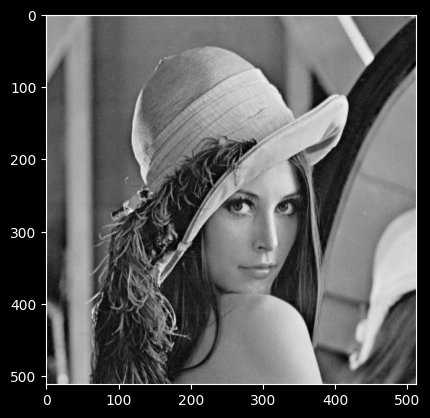

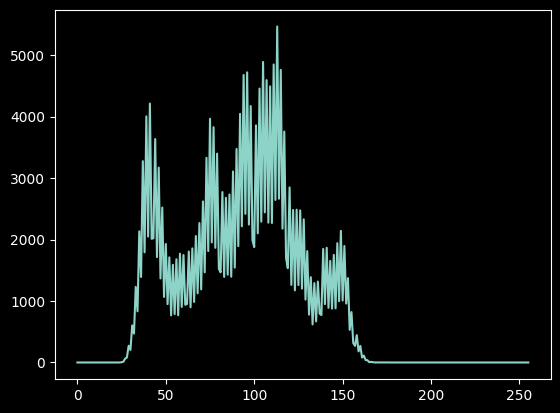

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(img, cmap='gray')
plt.show()

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

hist = np.zeros(256)

# Calculate the histogram from scratch
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] += 1
# or using flatten()
# for pixel_value in img.flatten():
#     hist[i] += 1


What can you say about the histogram? Is it in correlation with your response to question 1.1?

#### 1.4) To correct the luminance of the image, what can you do to stretch the image? Code it and visualize the resulting image.

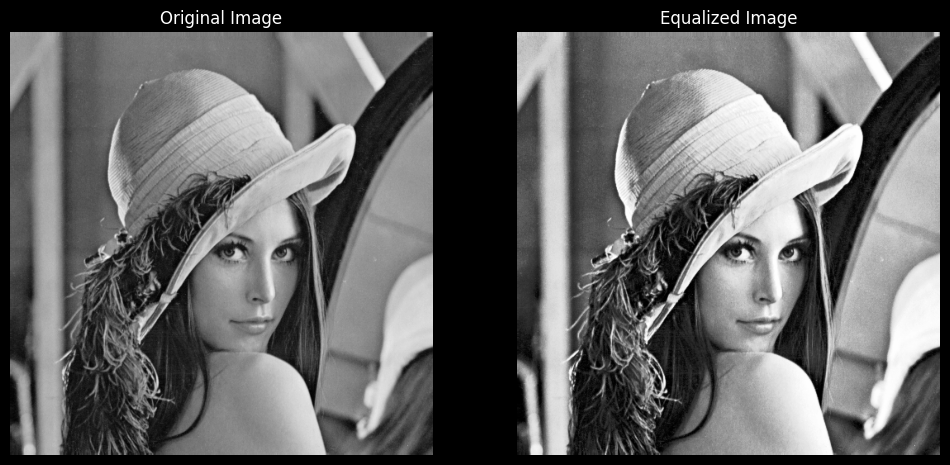

In [38]:
hist = np.zeros(256)
for pixel_value in img.ravel():
    hist[pixel_value] += 1

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF to the range [0, 255]
cdf_normalized = 255 * cdf / cdf[-1]

# Use the CDF to map old pixel values to new values
img_equalized = np.interp(img.ravel(), np.arange(256), cdf_normalized).reshape(img.shape).astype(np.uint8)

# Visualize the original and the equalized image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


#### 1.5) Compute the histogram of the resulting image. What do you remark?

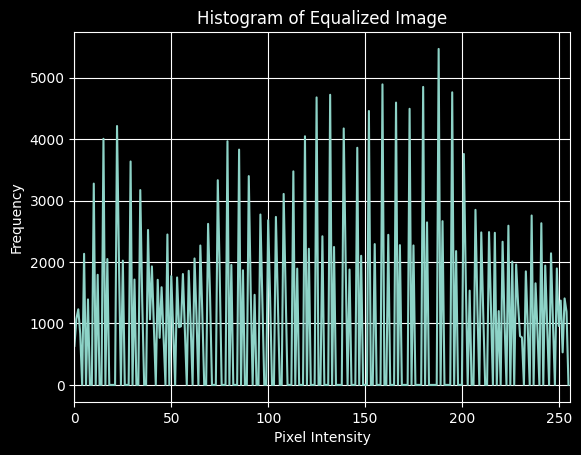

In [39]:
# Plot the histogram of the equalized image
hist_equalized = np.zeros(256)
for pixel_value in img_equalized.ravel():
    hist_equalized[pixel_value] += 1

plt.figure()
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist_equalized)
plt.xlim([0, 256])
plt.grid(True)
plt.show()

## 2. Histogram construction/manipulation for contrast correction

Histogram equalization consists in correcting an image that lacks contrast: its gray levels are concentrated on only a few values. The goal is to use the entire possible range of grayscale values and to have approximately as many pixels of each level.

#### 2.1) Using OpenCV and Numpy libraries, load the `weak_contrasted.png` grayscale image from the resources provided in this practical work.

#### 2.2) Compute the histogram and cumulative histogram of the image and visualize them using `matplotlib.pyplot` library.

#### 2.3) Normalize values of the cumulative histogram to bring them in [0, 255]: divide each value of the cumulative histogram by the total number of pixels, then multiply the result by 255.

The goal is to use the cumulated histogram as a conversion table of grayscale values to perform equalization.
#### 2.4) Complete the equalization of the histogram taking into account this goal and visualize the resulting image. Compare it with the original image.

#### 2.5) Plot the histogram of the resulting image. What happened to the histogram? Can you explain in more detail what happened when you consider the cumulative histogram?

#### 2.6) If we perform both processes (histogram stretching then histogram equalization), does the resulting image will be better ?

## 3. Histogram construction/manipulation for colored contrast correction


### Image `weak_colored_contrast.png` suffers from a lack of contrast. Doing the same process as above with some adjustments could correct this lack of contrast.

To your keyboards! 😂😂